<a href="https://colab.research.google.com/github/megsdata/sEMG_SupervisedLearning/blob/main/23May29_AllMuscles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pathlib
import os
import datetime
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
np.set_printoptions(precision=4)
print(tf.version.VERSION)

In [9]:
pip install pyyaml h5py  # Required to save models in HDF5 format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/MSC_THESIS/')
%cd /MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May24_All_Data
import pathlib
all_files =  sorted(str(p) for p in pathlib.Path('/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/').glob("*.csv"))

Mounted at /MSC_THESIS/
/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May24_All_Data


In [ ]:
#model
tf.random.set_seed(44)
single_feature_normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [ ]:
my_batches = tf.data.experimental.make_csv_dataset(
	#file_pattern="/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May24_All_Data/*.csv",
  all_files[0],
  #batch_size=500000, num_epochs=1,
  batch_size=10, num_epochs=1,
  select_columns=["EMG(mv)", "Pain Label"],
	num_parallel_reads=20,
	#shuffle_buffer_size=500000, label_name="Pain Label")
  shuffle_buffer_size=10000, label_name="Pain Label")

for feature_batch, label_batch in my_batches.take(5):
  dataset = tf.data.Dataset.from_tensor_slices((feature_batch, label_batch))
  training_batches = dataset.shuffle(len(label_batch)).batch(32).repeat().cache().prefetch(5)#shuffle the data
  ids, label_no = list(next(iter(training_batches)))
  myarray = np.asarray(list(ids.values()))
  history = model.fit(all_files[0], label_no, epochs=10)
history.history

In [ ]:
dataset2 = tf.data.Dataset.list_files("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/*.csv")
print(dataset2)
training_data = list(dataset.as_numpy_iterator())

<_ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>


Loading the Dataset

In [3]:
#load Rectus femoris ON
df = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_21_MATRIX.csv")
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_31_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_41_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_51_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_61_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_71_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_81_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_101_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_121_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))

#load Vastus lateralis ON
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_12_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_22_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_32_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_42_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_52_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_62_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_72_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_82_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_102_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_122_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))

#Tibialis anterior ON
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_13_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_23_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_33_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_43_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_53_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_63_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_73_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_83_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_103_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_123_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))

#Rectus femoris OFF
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_14_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_24_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_44_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_54_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_64_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_74_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_84_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_124_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))


#Vastus lateralis OFF
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_15_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_25_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_35_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_45_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_55_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_65_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_75_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_85_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_125_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))

#Tibialis anterior OFF
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_16_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_26_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_36_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_46_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_56_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_66_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_76_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))
temp = pd.read_csv("/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS/23May28_Training_Data/24-May-2023_86_MATRIX.csv")
df = pd.concat([df, temp], axis=0)
print(len(df.index))

df.head()

185964
275662
366300
431952
477782
565566
646300
716023
807866
907022
999059
1108260
1199160
1262277
1323509
1371712
1455405
1484158
1578424
1676051
1764910
1815009
1906037
1989103
2133080
2217200
2299467
2370380
2474176
2558286
2665559
2745042
2810182
2838907
2931249
2983107
3086112
3170772
3237906
3282451
3366833
3453936
3534701
3623715
3673000
3784203
3855999
3944796
4041588
4129225
4217077
4306149
4392336


,Participant ID,Trial ID,Trial Type,Pulse Width,Contraction Start Time(s),Contraction End Time (s),ContractionNo,Pain Label,Time(s),EMG(mv),Pulse,Stimulus,MMG_x,MMG_y,MMG_z,Ch7,Ch8
0,2,21,1,2.770736,8.156866,10.927602,1,1,8.1570,1.720270,547,7,0.505105,2.012084,0.431214,617,65535
1,2,21,1,2.770736,8.156866,10.927602,1,1,8.1572,2.646474,547,7,0.539575,1.966835,0.413001,617,65535
2,2,21,1,2.770736,8.156866,10.927602,1,1,8.1574,3.926238,547,7,0.573916,1.920676,0.396449,617,65535
3,2,21,1,2.770736,8.156866,10.927602,1,1,8.1576,5.511613,546,7,0.607993,1.873812,0.381605,617,65535
4,2,21,1,2.770736,8.156866,10.927602,1,1,8.1578,7.348377,546,7,0.641678,1.826453,0.368481,617,65535


In [ ]:
import sys
import gc
def obj_size_fmt(num):
    if num<10**3:
        return "{:.2f}{}".format(num,"B")
    elif ((num>=10**3)&(num<10**6)):
        return "{:.2f}{}".format(num/(1.024*10**3),"KB")
    elif ((num>=10**6)&(num<10**9)):
        return "{:.2f}{}".format(num/(1.024*10**6),"MB")
    else:
        return "{:.2f}{}".format(num/(1.024*10**9),"GB")


def memory_usage():
    memory_usage_by_variable=pd.DataFrame({k:sys.getsizeof(v)\
    for (k,v) in globals().items()},index=['Size'])
    memory_usage_by_variable=memory_usage_by_variable.T
    memory_usage_by_variable=memory_usage_by_variable\
    .sort_values(by='Size',ascending=False).head(10)
    memory_usage_by_variable['Size']=memory_usage_by_variable['Size']\
    .apply(lambda x: obj_size_fmt(x))
    return memory_usage_by_variable
memory_usage()

,Size
df,617.67MB
temp,11.45MB
_i1,9.98KB
_ii,9.98KB
_i5,9.98KB
_i6,9.80KB
_i,9.80KB
_i7,868.00B
_6,736.00B
_i4,736.00B


Prepping the Features and Labels

In [4]:
#select features
X = df[['EMG(mv)', 'Trial Type']]
y = df['Pain Label']

In [5]:
#create data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=44)

In [6]:
print("Number of samples in the training set: ", len(X_train))
print("Number of samples in the test set: ", len(X_test))
print("Number of samples in the validation set: ", len(X_val))

Number of samples in the training set:  2811094
Number of samples in the test set:  878468
Number of samples in the validation set:  702774


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

Classic Deep Network (Fully Connected)

In [8]:

tf.random.set_seed(42)
model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=3)

Epoch 1/3
87847/87847 [==============================] - 295s 3ms/step - loss: 0.4848 - accuracy: 0.7525 - precision: 0.8593 - recall: 0.7458
Epoch 2/3
87847/87847 [==============================] - 286s 3ms/step - loss: 0.4831 - accuracy: 0.7528 - precision: 0.8583 - recall: 0.7475
Epoch 3/3
87847/87847 [==============================] - 283s 3ms/step - loss: 0.4827 - accuracy: 0.7528 - precision: 0.8603 - recall: 0.7452


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               384       
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 99,457
Trainable params: 99,457
Non-trainable params: 0
_________________________________________________________________


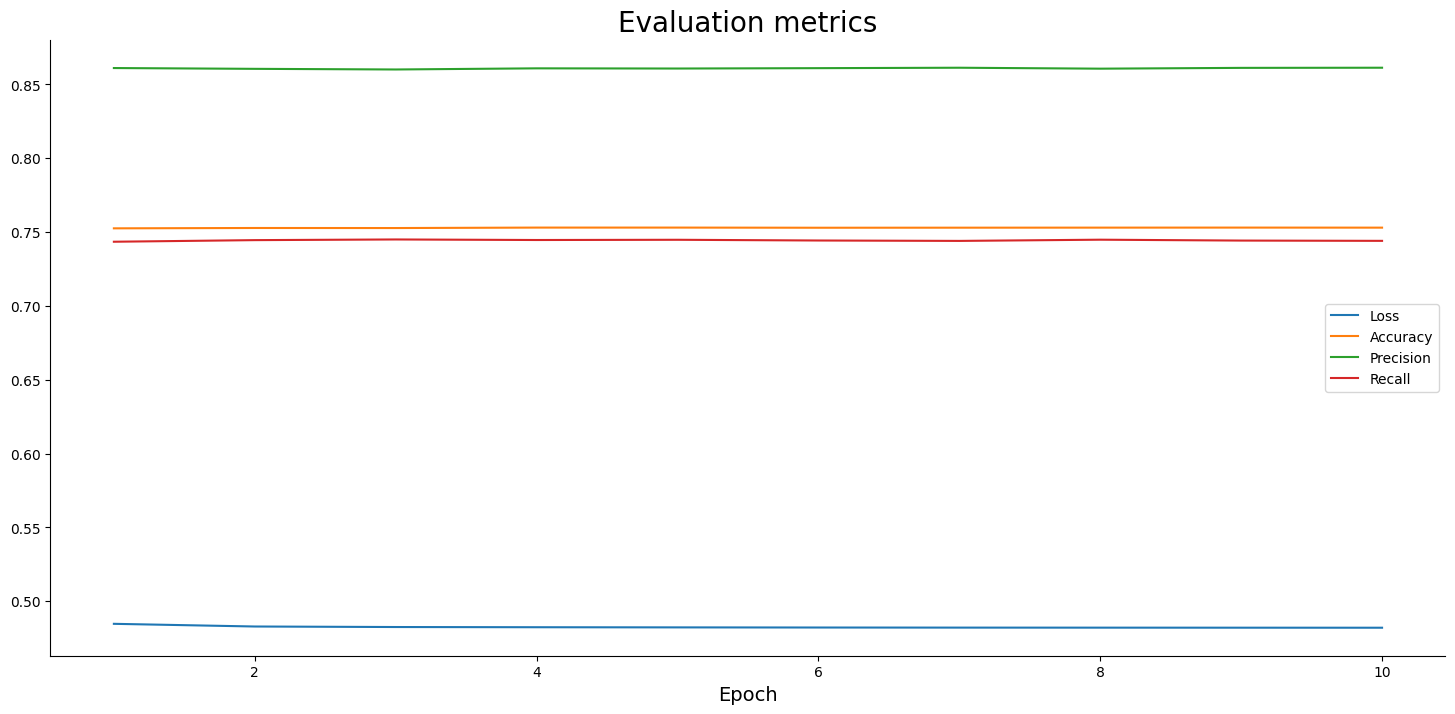

In [ ]:
#visualize performance
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(
    np.arange(1, 11), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 11), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 11), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 11), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [ ]:
#evaluate performance
predictions = model.predict(X_test_scaled)
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.4f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.4f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.4f}')

27453/27453 [==============================] - 36s 1ms/step
Accuracy: 0.7506
Precision: 0.8336
Recall: 0.7758


1D Convolutional Neural Network

In [ ]:
tf.random.set_seed(42)
time_steps = 2
model = tf.keras.Sequential([
    #tf.keras.layers.Input(shape=(None, None, 5, None), name="input"),
    #tf.keras.layers.RepeatVector(time_steps, name="repeatLayer"),
    tf.keras.layers.Conv1D(100, 2, activation='relu', name="convLayer", input_shape=(2, 1)),
    tf.keras.layers.Dense(128, activation='relu', name="relu1Layer"),
    tf.keras.layers.Dense(256, activation='relu', name="relu2Layer"),
    tf.keras.layers.Dense(256, activation='relu', name="relu3Layer"),
    #tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid', name="sigmoidLayer")
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)


In [ ]:
time_steps = 5
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(time_steps, 64), name="input"))
model.add(tf.keras.layers.Conv1D(64, 2, activation="relu", padding="same", name="convLayer"))

In [ ]:
history = model.fit(X_train_scaled, y_train, batch_size=100, epochs=1)
history.history

28111/28111 [==============================] - 141s 5ms/step - loss: 0.4974 - accuracy: 0.7510 - precision: 0.8774 - recall: 0.7221


{'loss': [0.4973910450935364],
 'accuracy': [0.7509902119636536],
 'precision': [0.8774018883705139],
 'recall': [0.7220987677574158]}

In [ ]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convLayer (Conv1D)          (None, 1, 100)            300       
                                                                 
 relu1Layer (Dense)          (None, 1, 128)            12928     
                                                                 
 relu2Layer (Dense)          (None, 1, 256)            33024     
                                                                 
 relu3Layer (Dense)          (None, 1, 256)            65792     
                                                                 
 flatten_9 (Flatten)         (None, 256)               0         
                                                                 
 sigmoidLayer (Dense)        (None, 1)                 257       
                                                                 
Total params: 112,301
Trainable params: 112,301
Non-t

In [ ]:
history = model.fit(X_train_scaled, y_train, batch_size=100, epochs=5)
history.history

Epoch 1/5
28111/28111 [==============================] - 138s 5ms/step - loss: 0.4998 - accuracy: 0.7517 - precision: 0.8790 - recall: 0.7215
Epoch 2/5
28111/28111 [==============================] - 139s 5ms/step - loss: 0.5007 - accuracy: 0.7500 - precision: 0.8775 - recall: 0.7202
Epoch 3/5
28111/28111 [==============================] - 136s 5ms/step - loss: 0.4998 - accuracy: 0.7515 - precision: 0.8792 - recall: 0.7210
Epoch 4/5
28111/28111 [==============================] - 134s 5ms/step - loss: 0.4996 - accuracy: 0.7517 - precision: 0.8790 - recall: 0.7217
Epoch 5/5
28111/28111 [==============================] - 135s 5ms/step - loss: 0.5011 - accuracy: 0.7491 - precision: 0.8767 - recall: 0.7196


{'loss': [0.49983155727386475,
  0.5006890892982483,
  0.4998264014720917,
  0.499641478061676,
  0.5010513663291931],
 'accuracy': [0.7516664266586304,
  0.7499791979789734,
  0.7514853477478027,
  0.7517390251159668,
  0.7491464018821716],
 'precision': [0.8790265321731567,
  0.8774856925010681,
  0.879181444644928,
  0.8790208101272583,
  0.8766576051712036],
 'recall': [0.7215278148651123,
  0.7202198505401611,
  0.7210407853126526,
  0.7216620445251465,
  0.7196478843688965]}

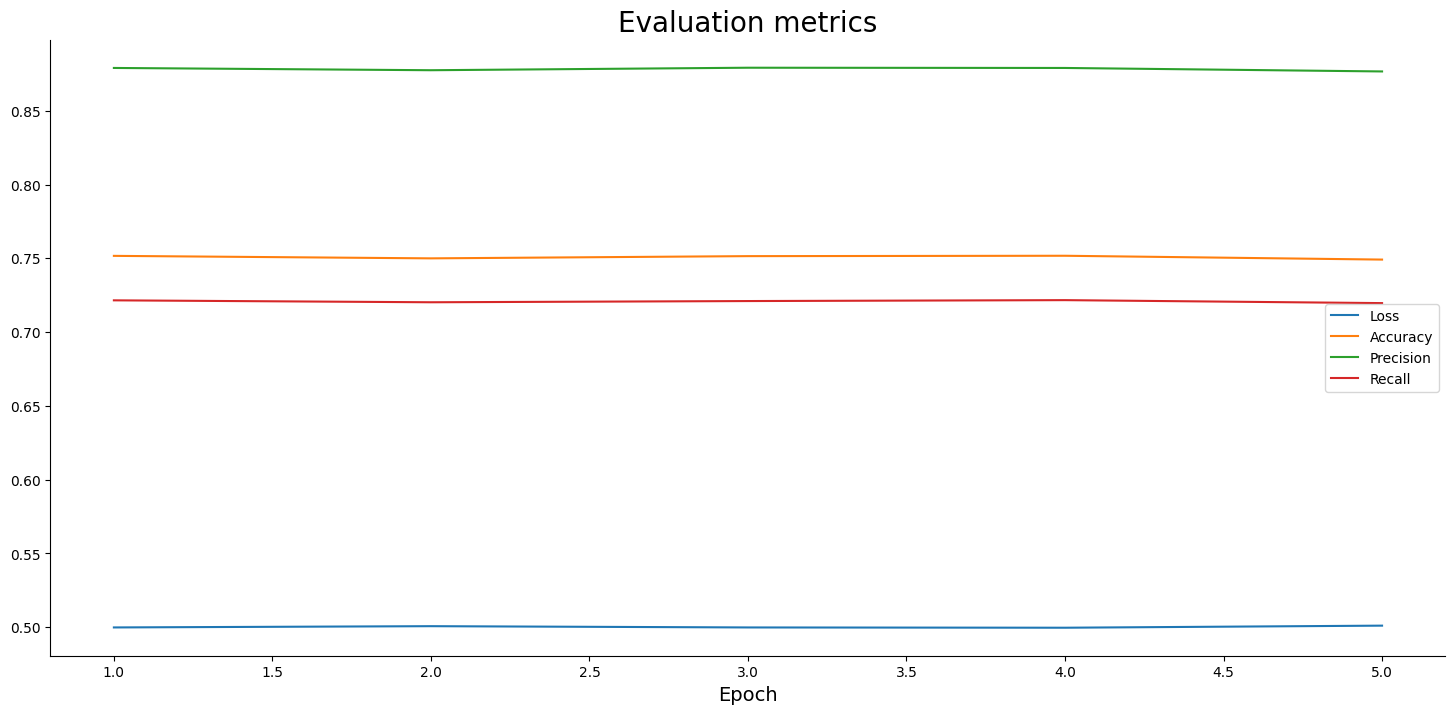

In [ ]:
#visualize performance
num_epochs = 5
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(
    np.arange(1, num_epochs+1), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, num_epochs+1), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, num_epochs+1), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, num_epochs+1), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [ ]:
#evaluate performance
predictions = model.predict(X_test_scaled)
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.4f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.4f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.4f}')

27453/27453 [==============================] - 73s 3ms/step
Accuracy: 0.7508
Precision: 0.8792
Recall: 0.7201


LSTM

In [ ]:
tf.random.set_seed(42)
time_steps = 2
model = tf.keras.Sequential([
    #tf.keras.layers.Conv1D(100, 2, activation='relu', name="convLayer", input_shape=(2, 1)),
    tf.keras.layers.LSTM(128, input_shape=(2, 1)),
    tf.keras.layers.Dense(128, activation='relu', name="relu1Layer"),
    tf.keras.layers.Dense(256, activation='relu', name="relu2Layer"),
    tf.keras.layers.Dense(256, activation='relu', name="relu3Layer"),
    #tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid', name="sigmoidLayer")
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    #optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.BinaryCrossentropy(name='binary cross entropy'),
        tf.keras.metrics.BinaryIoU(name='binary IoU')
    ]
)

Training the LSTM model: 
Epoch 1/50
21962/21962 [==============================] - 130s 6ms/step - loss: 0.4834 - accuracy: 0.7528 - precision: 0.8604 - recall: 0.7448 - binary cross entropy: 0.4834 - binary IoU: 0.5901
Epoch 2/50
21962/21962 [==============================] - 129s 6ms/step - loss: 0.4827 - accuracy: 0.7529 - precision: 0.8603 - recall: 0.7451 - binary cross entropy: 0.4827 - binary IoU: 0.5902
Epoch 3/50
21962/21962 [==============================] - 129s 6ms/step - loss: 0.4824 - accuracy: 0.7528 - precision: 0.8598 - recall: 0.7456 - binary cross entropy: 0.4824 - binary IoU: 0.5900
Epoch 4/50
21962/21962 [==============================] - 129s 6ms/step - loss: 0.4822 - accuracy: 0.7530 - precision: 0.8602 - recall: 0.7454 - binary cross entropy: 0.4822 - binary IoU: 0.5902
Epoch 5/50
21962/21962 [==============================] - 129s 6ms/step - loss: 0.4820 - accuracy: 0.7530 - precision: 0.8605 - recall: 0.7451 - binary cross entropy: 0.4820 - binary IoU: 0.5904

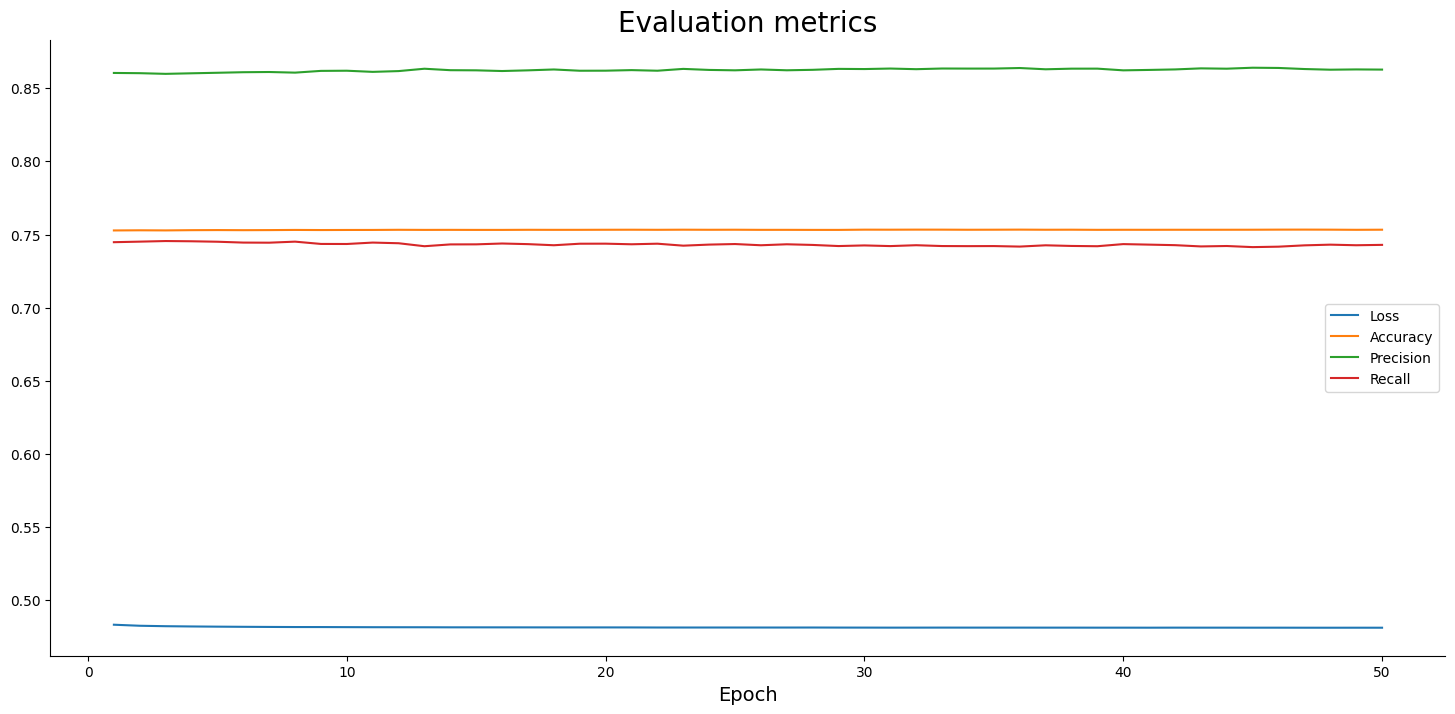

In [ ]:
#train the model
print("Training the LSTM model: ")
num_epochs = 50
history = model.fit(X_train_scaled, y_train, batch_size=128, epochs=num_epochs, shuffle=True)
model.summary()

#visualize performance
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(
    np.arange(1, num_epochs+1), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, num_epochs+1), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, num_epochs+1), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, num_epochs+1), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

#evaluate performance
predictions = model.predict(X_test_scaled)
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.4f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.4f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.4f}')

print("LTSM - finished!")

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard